In [84]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

In [85]:
doc_topic = np.load('./ENdata/topic14/doc_topic_3.npy')

In [86]:
doc_topic[0]

array([0.03571448, 0.03571521, 0.03571451, 0.03571457, 0.53571057,
       0.03571445, 0.03571446, 0.03571448, 0.03571457, 0.03571453,
       0.03571456, 0.0357145 , 0.03571447, 0.03571459])

In [87]:
model = KMeans(n_clusters=14, n_init='auto', random_state=666)
model.fit(doc_topic)
joblib.dump(model,f'./kmeansModel/EN14/batch3/14.model')
result = model.predict(doc_topic)
result
result.shape

(125290,)

In [88]:
model = joblib.load('./kmeansModel/EN14/batch3/14.model')
result = model.predict(doc_topic)
# 判断该文档是不是该主题的
mask = doc_topic < 1 / 14
doc_topic[mask] = 0
doc_topic[~mask] = 1
doc_topic.shape
doc_topic[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [89]:
# A的行为kmeans分出的类别，列为该类别中含各个主题的文档数量
A = np.zeros([14, 14])
category = np.zeros(14)
topic = np.sum(doc_topic, axis=0)
topic

array([23242., 32298., 22986., 25287., 24303., 23866., 23951., 23155.,
       30393., 25098., 27666., 22172., 23482., 31626.])

In [90]:
for i in range(len(result)):
    row = doc_topic[i]
    category[result[i]] += 1
    for j, item in enumerate(row):
        if item == 1:
            A[result[i]][j] += 1
print(A)
print(np.sum(A, axis=1))

[[  534.   401.  6036.   393.   402.   499.   499.   460.   442.   386.
    556.   400.   488.   469.]
 [ 1094.  1291.  1060.  1411.  1299.  1371.  1306.  1359. 14154.  1239.
   1643.  1288.  1062.  1079.]
 [ 1409. 15833.  1430.  1729.  1528.  1448.  1259.  1157.  1407.  1651.
   2069.  1422.  1418.  2081.]
 [  859.  1049.   889.   887.   721.   785.   929.   844.   976.   877.
   9162.   925.   932.   926.]
 [  668.   414.   440.   467.   423.   491.  6390.   731.   564.   513.
    506.   451.   546.   483.]
 [ 1403.  1521.  1070.  1354.  1535.  1684.  1133.  1110.  1040.  1395.
   1475.  1231.  1430. 14189.]
 [ 8700.  8675.  8644.  8508.  8556.  8711.  8739.  8749.  8664.  8633.
   8841. 13439.  8936.  8722.]
 [  685.   611.   654.  8107.   525.   745.   680.   754.   623.   763.
    699.   623.   670.   685.]
 [  745.   606.   780.   597.  7586.   731.   683.   673.   653.   604.
    816.   675.   816.   737.]
 [ 5135.   332.   373.   329.   349.   372.   418.   369.   351.   407.
 

In [91]:
# 计算卡方分布
CHI = np.zeros([14, 14])
for i in range(14):
    for j in range(14):
        a = A[i][j]
        b = category[i] - a
        c = topic[j] - a
        n = len(result)
        d = n - a - b - c
        CHI[i][j] = n * (a*d - b*c)**2 / ((a+c)*(b+d)*(a+b)*(c+d))
np.set_printoptions(suppress=True)
print(CHI)
# np.save('./data/CHI_4.npy', CHI)

[[  395.20027485  1213.57527144 28224.21667893   735.81595504
    658.0499729    478.04300503   482.76471995   496.45557712
    989.89675375   736.18781974   610.50787058   533.5228836
    472.93602776  1025.89592438]
 [ 1236.67177147  2314.04571451  1255.60296424  1033.34023771
   1065.93673036   907.02309291  1009.2788907    835.10457141
  49821.83877398  1267.01678631  1017.32114708   809.64023596
   1323.44925476  2624.92440377]
 [ 1117.31094335 52180.23591367  1049.61241326   965.20446599
   1101.17396698  1152.64448652  1461.04307557  1501.88223145
   2330.6766654   1043.59408107   855.84284214   945.13633527
   1139.65862469  1405.84283355]
 [  550.71310314  1060.76920578   492.93215486   676.69591347
    840.19562586   704.13386852   515.15725913   563.72081766
    995.86565757   675.11151771 34880.28106513   392.05499066
    476.66521189  1199.95843519]
 [  292.15235991  1310.83807775   590.36099715   692.81519787
    703.14820122   563.98273887 28489.73282286   221.59690992
 

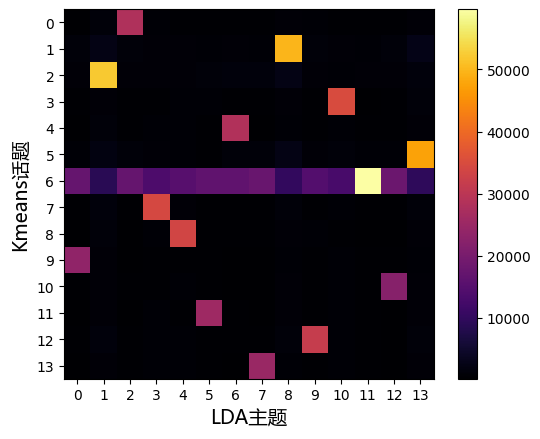

In [92]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=14) 
# CHI = np.load('./data/CHI_4.npy')
plt.imshow(CHI, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.xlabel('LDA主题', fontproperties=font)  
plt.ylabel('Kmeans话题', fontproperties=font)  
# plt.title('卡方检验结果', fontproperties=font)  
plt.xticks(np.arange(0, 14, step=1))
plt.yticks(np.arange(0, 14, step=1))
plt.savefig('./ENdata/topic14/卡方检验结果_3.png')
plt.show()

array([ 4602., 20903., 23159.,  5668.,  4494., 17362.,  8743., 10113.,
        7286.,  2435.,  5890.,  3375.,  8416.,  2844.])

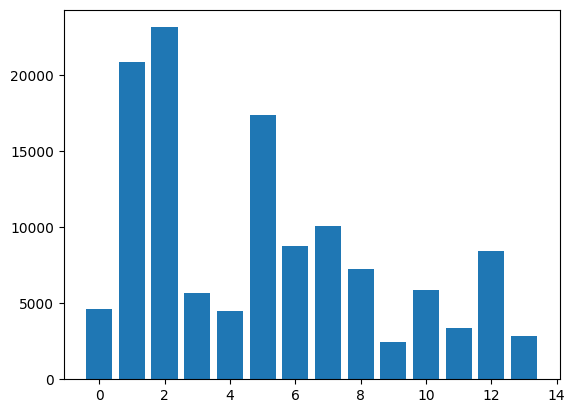

In [93]:
result = model.predict(doc_topic)
x_list = list(range(14))
y_list = np.zeros(14)
for i in result:
    y_list[i] += 1
plt.bar(x_list, y_list)
y_list

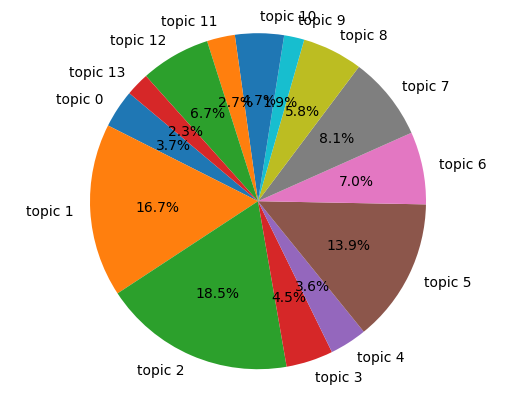

In [94]:
labels = ['topic ' + str(item) for item in x_list]
plt.pie(y_list, labels=labels, autopct='%1.1f%%', startangle=140)  
plt.axis('equal')
plt.savefig('./ENdata/topic14/第三部分各话题占比.png')
plt.show()